# *Predicting Boston Housing Prices using Random Forest*
#### Authors: Tom Sharp, Troy Sattgast


## Agenda ##
Part 1: Data Import, Exploration, and Cleaning <br>
Part 2: Decision Tree - The Building Block of Random Forest <br>
Part 3: Random Forest <br>
Part 4: Forest Simplification <br>
Part 5: Tuning the Forest

<br>
## Part 0: Environment Setup

In [53]:
# Import the os library, the pandas library (aliased as pd), and the numpy library (aliased as np)

import os
import pandas as pd
import numpy as np

In [54]:
print(os.getcwd())

C:\Users\tsattgast\Documents\PyScripts\random_forest


In [55]:
# Store the paths to frequently used files

parent_path = os.getcwd()
data_path = os.path.join(parent_path,  'data', 'Boston Housing Prices.csv')
data_dict_path = os.path.join(parent_path, 'data', 'boston_data_dict.csv')
image_path = os.path.join(parent_path, 'images')


print(parent_path)
print(data_path)
print(data_dict_path)
print(image_path)

C:\Users\tsattgast\Documents\PyScripts\random_forest
C:\Users\tsattgast\Documents\PyScripts\random_forest\data\Boston Housing Prices.csv
C:\Users\tsattgast\Documents\PyScripts\random_forest\data\boston_data_dict.csv
C:\Users\tsattgast\Documents\PyScripts\random_forest\images


## Part 1: Data Import, Exploration, and Cleaning

During any analysis, it is always important to first examine your data. This involves looking at the data itself, the column names, and some summary statistics about the data.

In [56]:
# Read in the data using the pandas package. The data is stored in what is called a dataframe (similar to a spreadsheet)

data = pd.read_csv(data_path)

In [57]:
# Examine number of rows and columns 

print("num of rows, num of columns = ", data.shape)

num of rows, num of columns =  (506, 17)


In [58]:
# That's a lot of rows. Let's just look at the first three columns of the data, instead of all of them

print(data.head(3))

         town  tract  longitude   latitude    crime  residential  industrial  \
0      Nahant   2011 -70.955002  42.255001  0.00632         18.0        2.31   
1  Swampscott   2021 -70.949997  42.287498  0.02731          0.0        7.07   
2  Swampscott   2022 -70.935997  42.283001  0.02729          0.0        7.07   

  river    nox  rooms      older  distance  highway  tax    ptratio  lstat  \
0    no  0.538  6.575  65.199997    4.0900        1  296  15.300000   4.98   
1    no  0.469  6.421  78.900002    4.9671        2  242  17.799999   9.14   
2    no  0.469  7.185  61.099998    4.9671        2  242  17.799999   4.03   

       cmedv  
0  24.000000  
1  21.600000  
2  34.700001  


In [59]:
# We can list all the column names by calling the "columns" attribute of "data" 
# Def: Attribute - describes the data (an adjective)

print(list(data.columns))

['town', 'tract', 'longitude', 'latitude', 'crime', 'residential', 'industrial', 'river', 'nox', 'rooms', 'older', 'distance', 'highway', 'tax', 'ptratio', 'lstat', 'cmedv']


In [60]:
# We can view summary statistics about the data by calling the "describe()" method of "data"
# Def: Method - take an action on the data (a verb)

print(data.describe())

             tract   longitude    latitude       crime  residential  \
count   506.000000  506.000000  506.000000  506.000000   506.000000   
mean   2700.355731  -71.056389   42.216440    3.613524    11.363636   
std    1380.036830    0.075405    0.061777    8.601545    23.322453   
min       1.000000  -71.289497   42.029999    0.006320     0.000000   
25%    1303.250000  -71.093226   42.180774    0.082045     0.000000   
50%    3393.500000  -71.052902   42.218100    0.256510     0.000000   
75%    3739.750000  -71.019625   42.252249    3.677083    12.500000   
max    5082.000000  -70.809998   42.381000   88.976196   100.000000   

       industrial         nox       rooms       older    distance     highway  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    11.136779    0.554695    6.284634   68.574901    3.795043    9.549407   
std      6.860353    0.115878    0.702617   28.148862    2.105710    8.707259   
min      0.460000    0.385000    3.5

In [61]:
#What do all these fields mean? Let's use the data dictionary to find out

data_dict = pd.read_csv(data_dict_path)
print(data_dict)

       Col Name                                         Definition
0          town                                       name of town
1         tract                                       census tract
2     longitude                               long of census tract
3      latitude                                lat of census tract
4         crime                      per capita crime rate by town
5   residential  proportion of residential land zoned for lots ...
6    industrial   proportion of non-retail business acres per town
7         river  Charles River dummy variable (= 1 if tract bou...
8           nox  nitric oxides concentration (parts per 10 mill...
9         rooms               average number of rooms per dwelling
10        older  proportion of owner-occupied units older than ...
11     distance  weighted distances to five Boston employment c...
12      highway          index of accessibility to radial highways
13          tax           full-value property-tax rate per $10

**This last value, *cmedv*, is what we would like to predict using a machine learning. Before we can predict, we need to make sure we clean the data.**

In [62]:
# check for NAs, NaNs, etc. 
any(data.isnull().sum(axis=1))

False

In [63]:
# Clean the data - do all of this at once 

data.fillna(0)
data['river'].replace('no', False, inplace = True)
data['river'].replace('yes', True, inplace = True)
data.drop(['town'], axis = 1, inplace = True)

print("Data clean!")

Data clean!


In [64]:
data.head()

,tract,longitude,latitude,crime,residential,industrial,river,nox,rooms,older,distance,highway,tax,ptratio,lstat,cmedv
0,2011,-70.955002,42.255001,0.00632,18.0,2.31,False,0.538,6.575,65.199997,4.0900,1,296,15.300000,4.98,24.000000
1,2021,-70.949997,42.287498,0.02731,0.0,7.07,False,0.469,6.421,78.900002,4.9671,2,242,17.799999,9.14,21.600000
2,2022,-70.935997,42.283001,0.02729,0.0,7.07,False,0.469,7.185,61.099998,4.9671,2,242,17.799999,4.03,34.700001
3,2031,-70.928001,42.292999,0.03237,0.0,2.18,False,0.458,6.998,45.799999,6.0622,3,222,18.700001,2.94,33.400002
4,2032,-70.921997,42.298000,0.06905,0.0,2.18,False,0.458,7.147,54.200001,6.0622,3,222,18.700001,5.33,36.200001


In [65]:
# Add a column for the average cmedv

val_mean = data['cmedv'].mean()*1000
print('The average housing price (in 1980) in Boston was ${:,.2f}'.format(val_mean))

The average housing price (in 1980) in Boston was $22,528.85


*Side Note - In most applications of data science and ML, we would take a closer look at cleaning the data. Data gathering and cleansing usually consumes +80% of the DS/ML process; however, this dataset happened to be extremely clean when it was retrieved from its source online.*

## Part 2: Decision Tree - The Building Block of Random Forest

<img src="images/tree_joke.jpg" height="500" align="center"/>


### Conceptual Introduction

In machine learning, the columns to be used as inputs (X) are referred to as the **features**, and the output (y) value is referred to as the **target** or the **label**.
<br>

Since we are given the target/label values in this dataset, the type of machine learning we will be doing is called **supervised**. 
<br>
In particular, we will be using a random forest. Before we jump into that, we need to understand the basic building block of that model, known as the decision tree. 
<br>
<br>
A decision tree is one of the easiest machine learning model to comprehend, since it is easily visualized. The below graphic is an example of a simple decision tree. Notice that each *node* contains a yes/no question, and each *branch* leads to a new node, unless it leads to an answer. These answers are called *leaves* or *leaf nodes*.

<img src="images/decision_tree_example.jpg" width="500" height="500" align="center"/>

How are these questions determined? The decision tree is given several features (inputs) and determines which questions to ask to *gain the most information from the oucome*, i.e., to increase **information gain**. You can think of a decision tree like a game of *Guess Who?*. Each round, you ask one question in order to get the most information out of the opposite player. 
<br>
<br>
For example, a popular first round question is, *"Is your character a man or woman?"*. This gives you a lot more information than asking *"Is your character Joe?"*.

<img src="images/guess_who.jpg" width="500" height="500" align="center"/>

### Splitting the Data

In order to perform supervised learning, we will **train** (aka, fit) our model, and then **test** our model to see how accurate it is. We do this by first dividing the data into the **training data** and the **testing data**. In order for our model to be trained adequately, we would like it to have as much data as possible. Therefore, we take 80% of our current dataset to be the training data, and the remaining 20% to be the testing data. This is somewhat arbitrary, but the split usually lies around 75 / 25 or 80 / 20. 
<br>

Also recall from above that the input (X) values are referred to as **features** and the output (y) values are referred to as **targets** or **labels**. We need to store the columns in our dataset into these variables before we can split our data.


<img src="images/splitting_data.png" width="700" height="700" align="center"/>

We will first split our data into **feaures** and **labels**, and then **training data** and **testing data**.

*Features vs. Labels*

In [66]:
# Drop the cmedv column - the features are all the columns except this one
features = data.drop(['cmedv'], axis=1)
feature_list = list(data.drop(['cmedv'], axis=1).columns)

# Drop all columns that aren't cmedv - cmedv is the only label
labels = data.drop(data.columns[data.columns != 'cmedv'], axis = 1)

# Convert to numpy arrays - these are similar to dataframes but have less structure. sklearn can only take numpy arrays
features = np.array(features)
labels = np.array(labels)

*Training Data vs. Testing Data*

In [67]:
# Use scikit-learn to split the data and store the data into variables. 
# Notice we specify test_size = 0.2. This gives the 80/20 split as explained above

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 1)

### The Supervised Learning Approach

As we know, a decision tree is a supervised learnin model, since we have labels that help the algorithm learn. The following picture depicts the supervised learning approach.

<img src="images/Supervised_Learning.png" width="700" height="700" align="center"/>


### Step 1: Train the Model

Sci-kit learn 3 lines of code to Train the Model

In [68]:
# import
from sklearn import tree

# instantiate 
decision_tree = tree.DecisionTreeRegressor(random_state = 8)

# train/fit
decision_tree = decision_tree.fit(X_train, y_train)

Let's see what our *Trained Model* looks like by converting the tree into an image.

In [69]:
#View picture after converting to png (I did this already)
!"images/tree.png"

*Side-Note: To convert this dot file on your own, you need to use some command line magic I converted the file beforehand, so you can view the tree by running this code block.
For anyone interested, the command line function is below (make sure you are cd'd into the random_forest/images directory and are in the dm_ml environment)*

>\> *dot -Tpng tree.dot -o tree.png*

### Step 2: Test the Model

Here, we will use the labels from the testing data to generate predictions on the housing prices. Let's see what the model comes up with.

In [70]:
# Use the forest's predict method on the test data
tree_predictions = decision_tree.predict(X_test)

# Format and print
tree_predictions = pd.Series(tree_predictions)
pd.DataFrame(data = {'predicted value': tree_predictions, 'actual value':list(y_test)})

,actual value,predicted value
0,[28.2000008],30.100000
1,[23.8999996],28.700001
2,[16.600000400000003],18.900000
3,[22.0],20.900000
4,[20.7999992],16.799999
5,[23.0],19.600000
6,[27.899999600000005],26.400000
7,[14.5],19.600000
8,[21.5],18.799999
9,[22.6000004],23.900000


<br>
As you can see, the predicted values differ from the y_values for each row; the accuracy of each row differs. To better understand our model, however, we want the overall accuracy of all the rows, using RMSE.

<img src="images/rmse_formula.png" width="200" height="200"/>

### Step 3: Calculate the Accuracy

Let's view the actual y values from the test data (y_test) next to the model's predicted values (predictions)

In [71]:
# Import some functions from sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate the ROOT-mse (mean square error), aka the RMSE
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_predictions))

# Print the results
print("Our tree's TEST RMSE is {:.2} or ${:,.2f}".format(tree_rmse, tree_rmse*1000))

Our tree's TEST RMSE is 3.7 or $3,653.28


This seems like a pretty good accuracy, except we **overfit** the model...

In [72]:
# What happens if we try to predict the y's on our training data?
predictions_training = decision_tree.predict(X_train)

# Calculate the RMSE
training_rmse = mean_squared_error(y_train, predictions_training)

print("Our tree's TRAIN RMSE is {:.2f}.".format(training_rmse))

Our tree's TRAIN RMSE is 0.00.


By fitting the model "out of the box", we allowed the tree to grow as large as possible (we can see this because there was absolutely no error when it predicted the y values for the training data... the model predicted every y value exactly.).This causes the tree to overfit the data. 

Overfitting is when the model follows the *"noise"* of the **training data** too closely, and therefore won't predict general input data later on. 

<img src="images/overfitting_underfitting.png" width="700" height="700" align="center"/>

There are ways to combat overfitting by tuning the model. One way to do this is decrease the depth of the tree (either during or after fitting - research *pruning*). We won't get into that here, instead we will show another way to more accurately (and powerfully) predict our outcomes - the random forest.

*Side note - Please note that if we set the random states to different numbers, the result would be different, however While this decision tree is quite accurate, we can possibly improve accuracy using the random forest model The random forest model essentially builds multiple decision trees, takes the outputs from all of those trees, and determines the best prediction by taking the average (regression) or the mode (classification) of the outputs*

## Part 3: Random Forest

<img src="images/random-forest.jpg" width="700" height="700" align="center"/>


The random forest is an **ensemble model** i.e., it combines multiple models into one larger model. By combining multiple decision trees, the random forest is able to improve the prediction accuracy. 

<br> The random forest combines multiple decision trees by using a concept called **bootstrap aggregating**, or **bagging** for short. This method builds multiple (usually 1,000's) decision trees during the *Train the Model* step. When we *Test the Model*, each decision tree predicts the output and the random forest combines all the outputs into a *single* output. It does this by either taking a majority vote (in classification) or by aggregating the values (in regression, which is our case) by use of a mean, median, etc. 

This is all done behind the scenes within sklearn. The same 3-step process is used (recall that the data was originally split above).

### Step 1: Train the Model

In [73]:
# Again, we import, instantiate, and then fit
# Here, n_estimators is the number of decision trees in our random forest

# import 
from sklearn.ensemble import RandomForestRegressor

# instantiate 
rf = RandomForestRegressor(n_estimators = 1000, random_state = 10)

# train/fit
rf.fit(X_train, y_train)

C:\Users\tsattgast\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

### Step 2: Test the Model

In [74]:
# Now let's predict and see the predictions next to the actual y values

# predict
rf_predictions = rf.predict(X_test)

# format and print
pd.DataFrame(data = {'predicted values':rf_predictions, 'actual value': list(y_test)}).head()

,actual value,predicted values
0,[28.2000008],29.8702
1,[23.8999996],26.5618
2,[16.600000400000003],18.5152
3,[22.0],21.4070
4,[20.7999992],19.6283


In [75]:
# Open image file
!("images/tree_from_random_forest_output.png")

### Step 3: Calculate the Accuracy

In [76]:
# Calculate accuracy (RMSE)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

# Format and print
print("Our tree's RMSE is {:.2} or ${:,.2f}. \n...getting better".format(rf_rmse, rf_rmse*1000))

Our tree's RMSE is 2.8 or $2,787.19. 
...getting better


Although we see that simply using random forest is better than a single decision tree, there is still room for improvement. These next 2 sections will show you some techniques to both simplify and tune your model in order to improve its accuracy.

## Part 4: Forest Simplification

Let's see which factors of a neighborhood influence it's price the most. We can do this using a few more complex techniques in Python. 
<br>

I won't be getting into these and I am also going to use some code that was written by William Koehrsen in his article that can be found here: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [77]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: lstat                Importance: 0.5
Variable: rooms                Importance: 0.29
Variable: distance             Importance: 0.05
Variable: crime                Importance: 0.04
Variable: longitude            Importance: 0.02
Variable: nox                  Importance: 0.02
Variable: older                Importance: 0.02
Variable: tract                Importance: 0.01
Variable: latitude             Importance: 0.01
Variable: industrial           Importance: 0.01
Variable: tax                  Importance: 0.01
Variable: ptratio              Importance: 0.01
Variable: residential          Importance: 0.0
Variable: river                Importance: 0.0
Variable: highway              Importance: 0.0


It looks like lstat and rooms make up about 80% of the importance in predicting the housing price.<br>
Does this make sense? It is always improtant to look at your model output and determine if it logically matches the context of the problem

In [78]:
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
cumulative_importances = np.round(np.cumsum(sorted_importances),2)

importance_df = pd.DataFrame({'features': sorted_features, 'importance': sorted_importances, 'cumulative importance': cumulative_importances})
importance_df

,cumulative importance,features,importance
0,0.50,lstat,0.50
1,0.79,rooms,0.29
2,0.84,distance,0.05
3,0.88,crime,0.04
4,0.90,longitude,0.02
5,0.92,nox,0.02
6,0.94,older,0.02
7,0.95,tract,0.01
8,0.96,latitude,0.01
9,0.97,industrial,0.01


We can pick what we want our cumulative importance to be. Here I chose 95%

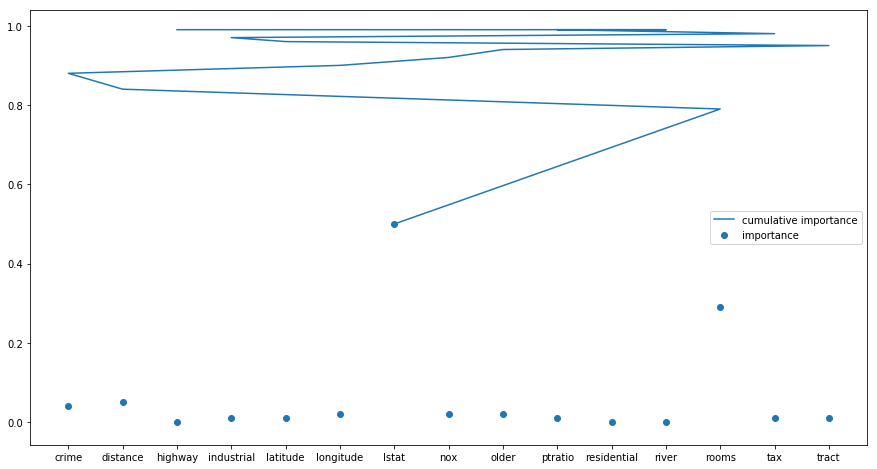

In [79]:
# This will not work on your comp - need to install matplotlib!

from matplotlib import pyplot as plt
%matplotlib inline

features = importance_df['features']
importance =  importance_df['importance']
cumulative_importance = importance_df['cumulative importance']


fig, ax = plt.subplots(figsize = (15,8))
ax.scatter(features, importance, label="importance")
ax.plot(features, cumulative_importance, label="cumulative importance")
ax.legend()

plt.show()

In [80]:
# Return only enough features to give us 95% importance 

new_df = importance_df[importance_df['cumulative importance'] <= 0.95]
new_df

,cumulative importance,features,importance
0,0.50,lstat,0.50
1,0.79,rooms,0.29
2,0.84,distance,0.05
3,0.88,crime,0.04
4,0.90,longitude,0.02
5,0.92,nox,0.02
6,0.94,older,0.02
7,0.95,tract,0.01


Let's say we only want to use these features. We can re-run the random forest with only these

In [81]:
#split the data - features vs labels
features = data[new_df.features]
labels = data['cmedv']
print(list(features.columns))

#convert to numpy arrays
import numpy as np
features = np.array(features)
labels = np.array(labels)

#split the data - training vs testing 
from sklearn.model_selection import train_test_split
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    features, labels, test_size = 0.2, random_state = 1)

['lstat', 'rooms', 'distance', 'crime', 'longitude', 'nox', 'older', 'tract']


### Step 1: Train the Model

In [82]:
# import - we already did this above!

# instantiate
rf_simple = RandomForestRegressor(n_estimators = 1000, random_state = 10)

# train/fit
rf_simple.fit(X_train_simple, y_train_simple)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

### Step 2: Test the Model

In [83]:
# Predict 
rf_simple_predictions = rf_simple.predict(X_test_simple)

# Format and print
print(pd.DataFrame({'predictions': rf_simple_predictions, 'actual values': y_test_simple}).head())

   actual values  predictions
0      28.200001      28.4153
1      23.900000      26.1142
2      16.600000      18.0141
3      22.000000      21.6454
4      20.799999      19.7472


### Step 3: Calculate the Accuracy

In [84]:
# Calculate accuracy (RMSE)
rf_simple_rmse = np.sqrt(mean_squared_error(y_test_simple, rf_simple_predictions))

# Format and print
print("Our tree's RMSE is {:.2} or ${:,.2f}.".format(rf_simple_rmse, rf_simple_rmse*1000))

Our tree's RMSE is 2.8 or $2,829.21.


Remember that our first random forest's RMSE was $2,787.01. Our model got worse!
<br>
<br>

But only slightly... we lost a few % points of accuracy, but were able to cut the number of inputs into our model by about half. This proves that (1) those other inputs added almost no value, and (2) we don't always need a super complex model in machine learning. 

<br>
*Side note - What we also gained here is decreased runtime - it took less computation time to get almost the same accuracy. This trade-off is extremely important in data science, especially when developing a model that will scale and/or will potentially be deployed in production.*

## Part 5: Tuning the Forest

"While model parameters are learned during training — such as the slope and intercept in a linear regression — hyperparameters must be set by the data scientist before training." - William Koehrsen
<br>


In [85]:
# Number of trees in random forest
n_estimators = [1000, 2000, 3000]

# Number of features to consider at every split
max_features =  ['sqrt', 'log']

# Maximum number of levels in tree
max_depth = [None, 1, 2, 4]

# Minimum number of samples required to split a node
min_samples_split = [2, 4, 8]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


In [86]:
#create a grid
cv_grid = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf
          }

In [89]:
# utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


*This will take some time to run....*

In [ ]:
# run grid search
from sklearn.model_selection import GridSearchCV
from time import time

rf = RandomForestRegressor(max_depth=2, random_state=10)
grid_search = GridSearchCV(rf, param_grid=cv_grid, cv=5)
start = time()
grid_search.fit(X_train, y_train.ravel())

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

In [ ]:
# Predict 
grid_predictions = rf_simple.predict(X_test_simple)

# Format and print
print(pd.DataFrame({'predictions': grid_predictions, 'actual values': y_test}).head())

In [ ]:
# Calculate accuracy (RMSE)
rf_grid_rmse = np.sqrt(mean_squared_error(y_test, grid_predictions))

# Format and print
print("Our tree's RMSE is {:.2} or ${:,.2f}.".format(rf_grid_rmse, rf_grid_rmse*1000))

<br>
<br>
## Resources 

<img src="images/data_science.jpg" width="400" height="400" align="right"/>

### Introductory Topics ###

*How to Become a Data Science* <br>
https://towardsdatascience.com/how-to-learn-data-science-if-youre-broke-7ecc408b53c7 <br>
https://www.class-central.com/subject/data-science <br>

*Jupyter* <br>
https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html

*Pandas* <br>
https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python


### Deep Dive Topics ###

*Information Gain and Entropy* <br>
https://www.saedsayad.com/decision_tree.htm <br>

*Ensemble Models - The Power of Crowds and Aggregated Predictions* <br>
https://www.npr.org/sections/money/2015/08/07/429720443/17-205-people-guessed-the-weight-of-a-cow-heres-how-they-did <br>

*Random Forest - Feature Information* <br>
http://explained.ai/rf-importance/index.html <br>
http://www.scikit-yb.org/en/latest/api/features/importances.html <br>

*Grid Search* <br>
https://www.quora.com/Machine-Learning-How-does-grid-search-work <br>


### General ####

*Good Reads* <br>
https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6 <br>
https://medium.com/machine-learning-for-humans/why-machine-learning-matters-6164faf1df12 <br>
https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d <br>
https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 <br>
https://github.com/WillKoehrsen/Data-Analysis/tree/master/random_forest_explained <br>
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

*Data Source* <br>
https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html